In [1]:
import torch

In [2]:
x = torch.Tensor(2, 4)
x.shape

torch.Size([2, 4])

当requires_grad为true， 表示tensor需要自动微分，grad存储微分值， grad_fn表示微分函数，当叶子节点的require_grad为true时，中间节点都会变为true，只要在输出节点调用反向传播函数，就会自动求出叶子节点的微分值并存在grad中，只有叶子节点的grad能被更新

In [3]:
x = torch.ones(2)
x.requires_grad

False

In [4]:
print(x.grad, x.grad_fn)

None None


In [5]:
x.requires_grad = True # 只有这里设置为true，下面才会有grad_fn 

In [6]:
z = 4*x
z, z.grad_fn

(tensor([4., 4.], grad_fn=<MulBackward0>), <MulBackward0 at 0x7fb264781c00>)

In [7]:
y = z.norm()
y

tensor(5.6569, grad_fn=<LinalgVectorNormBackward0>)

In [8]:
y.backward()
x.grad, z.grad, y.grad

/tmp/ipykernel_37406/2587390850.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  x.grad, z.grad, y.grad


(tensor([2.8284, 2.8284]), None, None)

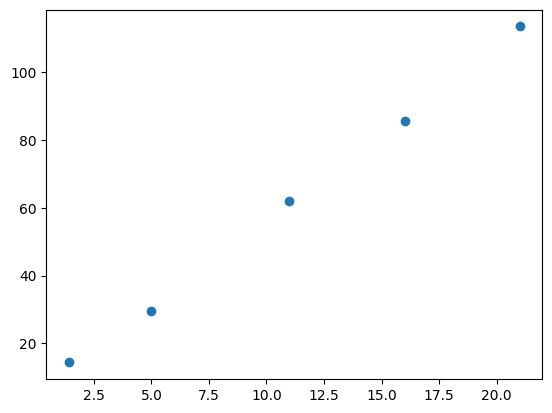

In [9]:
import torch
import matplotlib.pyplot as plt

#数据
x=torch.Tensor([1.4,5,11,16,21])
y=torch.Tensor([14.4,29.6,62,85.5,113.4])

#将x，y转化为numpy数据类型，绘制散点图
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [10]:
#生成矩阵X
def Produce_X(x):
	x0 = torch.ones(x.numpy().size) #用ones产生初始值为1，大小与x相同的向量
	X = torch.stack((x,x0),dim=1)   #stack函数将两个向量拼合
	return X


x = torch.Tensor([1.4,5,11,16,21])
y = torch.Tensor([14.4,29.6,62,85.5,113.4])
X = Produce_X(x)

#定义权重w的变量
w = torch.rand(2,requires_grad=True)

inputs = X 
target = y

X.shape, y.shape, w.shape

(torch.Size([5, 2]), torch.Size([5]), torch.Size([2]))

In [11]:
def draw(output,loss):
	plt.cla()
	plt.scatter(x.numpy(), y.numpy())
	
	plt.plot(x.numpy(), output.data.numpy(),'r-', lw=5)
	plt.text(0.5, 0,'Loss=%s' % (loss.item()),fontdict={'size':20,'color':'red'})
	#plt.text(3, 9,'Loss=%s' % (loss.item()),fontdict={'size':20,'color':'red'})
	#plt.axis([10, 160, 0, 0.03])

	plt.pause(0.005)

#训练
def train(epochs=1,learning_rate=0.01):
	for epoch in range(epochs):

		#前向传播
		output = inputs.mv(w) #公式：y=Xw
		print(output)
		loss = (output - target).pow(2).sum()#公式：J = ∑(y-y')^2

		#反向传播
		loss.backward() 
		w.data -= learning_rate * w.grad  #更新权重w，公式：w_(t+1)= w_(t) - 𝜼*▽J

		w.grad.zero_() #清空grad的值

		if epoch % 80 == 0:
			draw(output,loss)

	#plt.savefig('plot1.png', format='png')

	return w,loss

tensor([0.1362, 0.2723, 0.4991, 0.6880, 0.8770], grad_fn=<MvBackward0>)


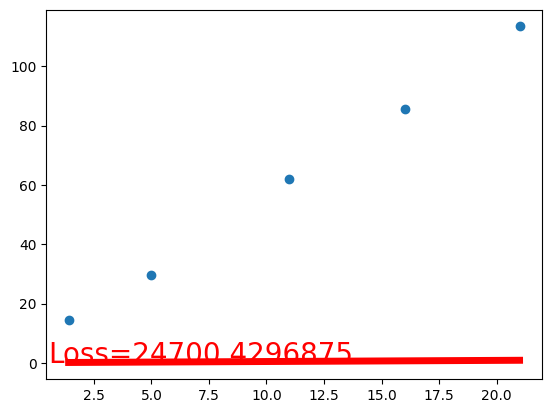

tensor([ 1.4744,  4.8959, 10.5983, 15.3504, 20.1025], grad_fn=<MvBackward0>)
tensor([ 2.5857,  8.7350, 18.9839, 27.5247, 36.0654], grad_fn=<MvBackward0>)
tensor([ 3.5087, 11.9229, 25.9466, 37.6330, 49.3195], grad_fn=<MvBackward0>)
tensor([ 4.2753, 14.5700, 31.7278, 46.0261, 60.3243], grad_fn=<MvBackward0>)
tensor([ 4.9121, 16.7681, 36.5281, 52.9948, 69.4615], grad_fn=<MvBackward0>)
tensor([ 5.4410, 18.5934, 40.5139, 58.7810, 77.0481], grad_fn=<MvBackward0>)
tensor([ 5.8805, 20.1091, 43.8234, 63.5853, 83.3473], grad_fn=<MvBackward0>)
tensor([ 6.2456, 21.3678, 46.5714, 67.5744, 88.5774], grad_fn=<MvBackward0>)
tensor([ 6.5490, 22.4131, 48.8531, 70.8865, 92.9199], grad_fn=<MvBackward0>)


In [12]:
w,loss = train(10,learning_rate = 1e-4) 

In [13]:
print(loss.item())

919.1204833984375


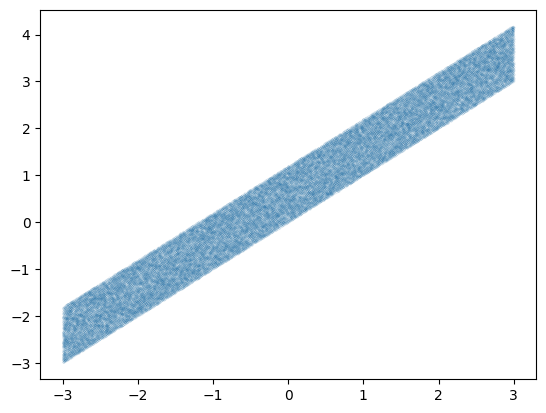

In [14]:
x = torch.linspace(-3,3,100000)#用linspace产生（-3，3）区间内的100000个点
X = Produce_X(x)
y = x +1.2*torch.rand(x.size())#假设真实函数是y=x，我们在上面增加一些误差，更加符合实际情况
w = torch.rand(2) #定义权重w的变量

#散点图查看样本数据的分布情况
plt.scatter(x.numpy(),y.numpy(),s=0.001)
plt.show()

In [15]:
torch.cuda.is_available()

True

In [26]:
from time import perf_counter

CUDA = torch.cuda.is_available()
if CUDA:
	inputs = X.cuda() 
	target = y.cuda()
	w = w.cuda()
	w.requires_grad=True
else:
	inputs = X 
	target = y
	w = w
	w.requires_grad=True

def draw(output,loss):
	#print loss
	if CUDA:
		output= output.cpu()
	plt.cla()
	plt.scatter(x.numpy(), y.numpy())
	plt.plot(x.numpy(), output.data.numpy(),'r-', lw=5)
	plt.text(0.5,0,'Loss=%s' % (loss.item()),fontdict={'size':20,'color':'red'})
	plt.pause(0.005)

def train(epochs=1,learning_rate=0.01):
	print(inputs.device, w.device) # tensor运行的device
	for epoch in range(epochs):

		#前向传播
		output = inputs.mv(w) #公式：y=Xw
		loss = (output - target).pow(2).sum()/100000 #公式：J = (∑(y-y')^2)/100000

		#反向传播
		loss.backward() 
		w.data -= learning_rate * w.grad  #更新权重w，公式：w_(t+1)= w_(t) - 𝜼*▽J
		w.grad.zero_() #清空grad的值
		
		
		# if epoch % 80 == 0:
		# 	draw(output,loss)
		

	return w,loss

start = perf_counter()
w,loss = train(10000,learning_rate=1e-4)  #学习率设置为1x10^(-4)
finish = perf_counter()
time = finish-start

print("计算时间:%s" % time)
print("final loss:",loss.item())
print("weights:",w.data)

cuda:0 cuda:0
计算时间:3.8266292759981297
final loss: 0.11985186487436295
weights: tensor([1.0008, 0.6013], device='cuda:0')


In [27]:
a = torch.linspace(-3, 3, 100000)
a.shape


torch.Size([100000])

In [29]:
# unsqueeze 就是在指定的dim上插入1维 
b = torch.unsqueeze(a, dim=0)
b.shape
# [1, 100000]

c = torch.unsqueeze(a, dim=1)
c.shape
#[10000, 1]

torch.Size([1, 100000])

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn,optim
from time import perf_counter

In [2]:
x = torch.unsqueeze(torch.linspace(-3,3,100000),dim=1)

#假设真实函数是y=x，我们在上面增加一些误差，更加符合实际情况
y = x +1.2*torch.rand(x.size())


class LR(nn.Module):
	def __init__(self):
		super(LR,self).__init__()
		self.linear = nn.Linear(1,1)

	def forward(self,x):
		out = self.linear(x)
		return out

In [3]:
CUDA = torch.cuda.is_available()

if CUDA:
	LR_model = LR().cuda()
	inputs = x.cuda()
	target = y.cuda()
else:
	LR_model = LR()
	inputs = x
	target = y

/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
criterion = nn.MSELoss()
optimizer = optim.SGD(LR_model.parameters(),lr=1e-4)

In [11]:
#可视化
#plt.ion()
#plt.show()
def draw(output,loss):
	
	if CUDA:
		output = output.cpu()
	plt.cla()
	plt.scatter(x.numpy(), y.numpy())
	plt.plot(x.numpy(), output.data.numpy(),'r-', lw=5)
	plt.text(0.5,0,'Loss=%s' % (loss.item()),fontdict={'size':20,'color':'red'})
	plt.pause(0.005)

def train(model,criterion,optimizer,epochs):
	for epoch in range(epochs):
		#forward
		output = model(inputs)
		loss = criterion(output,target)

		#backward
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		
		
		# if epoch % 80 == 0:
		# 	draw(output,loss)
		
	return model,loss

In [12]:
start = perf_counter()
LR_model,loss = train(LR_model,criterion,optimizer,10000)
finish = perf_counter()
time = finish-start
print("计算时间:%s" % time)
print("final loss:",loss.item())
print("weights:",list(LR_model.parameters()))

计算时间:5.818258739000157
final loss: 0.12021493911743164
weights: [Parameter containing:
tensor([[1.0009]], requires_grad=True), Parameter containing:
tensor([0.6066], requires_grad=True)]


计算时间:6.06266178900114
final loss: 0.12259715050458908
weights: [Parameter containing:
tensor([[1.0009]], requires_grad=True), Parameter containing:
tensor([0.6491], requires_grad=True)]

optimizer.zero_grad() 需要每次都重置吗？

In [4]:
import torch
import matplotlib.pyplot as plt
from torch import nn,optim
import torch.nn.functional as F

x = torch.unsqueeze(torch.linspace(-3,3,10000),dim=1)
y = x.pow(3)+1.3*torch.rand(x.size())

In [5]:
class Net(nn.Module):  # 继承 torch.nn 的 Module
    def __init__(self, input_feature, num_hidden, outputs):
        super(Net, self).__init__()     # 继承 __init__ 
        # 定义每层神经元的结构与数目
        self.hidden = nn.Linear(input_feature, num_hidden)   # 线性隐含层
        self.out = nn.Linear(num_hidden, outputs)   # 输出层
 
    def forward(self, x):  
        # 前向传播输入值
        x = F.relu(self.hidden(x))      # 激励函数ReLU处理隐含层的输出
        x = self.out(x)             # 最终输出值
        return x

CUDA = torch.cuda.is_available()

if CUDA:
	#初始化输入神经元数目为1，隐含层数目为20，输出神经元数目为1的神经网络模型
	net = Net(input_feature=1, num_hidden=20, outputs=1).cuda()
	inputs = x.cuda()
	target = y.cuda()
else:
	net = Net(input_feature=1, num_hidden=20, outputs=1)
	inputs = x
	target = y

optimizer = optim.SGD(net.parameters(), lr=0.01)  # 传入 net 的所有参数, 学习率
criterion = nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)
 
def draw(output,loss):
	
	if CUDA:
		output = output.cpu()
	plt.cla()
	plt.scatter(x.numpy(), y.numpy())
	plt.plot(x.numpy(), output.data.numpy(),'r-', lw=5)
	plt.text(-2,-20,'Loss=%s' % (loss.item()),fontdict={'size':20,'color':'red'})
	plt.pause(0.005)

def train(model,criterion,optimizer,epochs):
	for epoch in range(epochs):
		#forward
		output = model(inputs)
		loss = criterion(output,target)

		#backward
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		
		
		# if epoch % 80 == 0:
		# 	draw(output,loss)
		#plt.savefig('plot2.png', format='png')

	return model,loss

In [6]:
net,loss = train(net,criterion,optimizer,10000)

print("final loss:",loss.item())
print("weights:",list(net.parameters()))

final loss: 0.1602955162525177
weights: [Parameter containing:
tensor([[ 0.6655],
        [-0.0313],
        [-0.2225],
        [ 0.2394],
        [ 1.4211],
        [-0.0908],
        [-0.1985],
        [ 0.1897],
        [-1.8073],
        [ 1.6363],
        [ 0.4702],
        [-0.9237],
        [ 0.1255],
        [-1.8839],
        [ 0.2272],
        [ 1.6585],
        [-1.8711],
        [ 0.6346],
        [ 1.7739],
        [ 0.2135]], requires_grad=True), Parameter containing:
tensor([-1.1847, -0.4266, -0.6677,  1.1426, -2.8499, -0.2723,  0.9644, -0.5691,
        -1.5974, -2.4796, -0.2126, -2.4390,  0.6557, -3.0552, -0.9692, -4.0278,
        -4.2767, -1.6939, -1.6144,  0.8898], requires_grad=True), Parameter containing:
tensor([[ 1.2993,  0.0059,  0.2088,  0.6902,  3.0012,  0.0851, -0.6329, -0.1504,
         -2.3900,  2.8568,  0.4474, -2.5074,  0.4566, -3.5290,  0.1671,  4.2040,
         -4.5670,  1.7711,  2.2042,  0.3997]], requires_grad=True), Parameter containing:
tensor([-0.19

optimizer.zero_grad() 不重置loss会变得很大.

因为optimizer.zero_grad() 重置的是grad，重置了梯度，而不是权重，如果不重置，梯度会累加，最终梯度爆炸。  

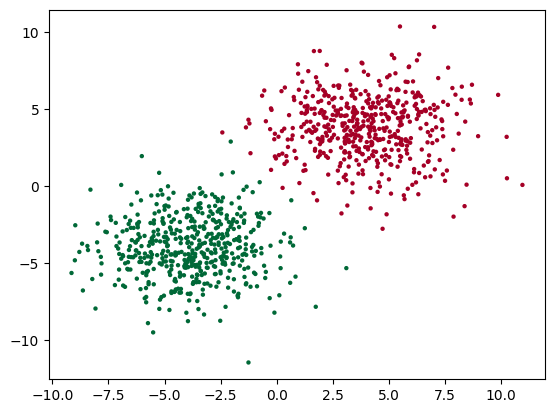

0.6665709018707275
0.48920413851737976
0.38819369673728943
0.3644246757030487
0.3539077341556549
0.3477648198604584
0.3436465561389923
0.34065181016921997
0.33835476636886597
0.33652493357658386
0.3350256681442261
0.3337700366973877
0.33270004391670227
0.33177509903907776
0.33096587657928467
0.3302507698535919
0.32961341738700867
0.3290409743785858
0.3285234868526459
0.32805296778678894
0.3276228904724121
0.32722795009613037
0.32686373591423035
0.3265266418457031
0.3262135088443756


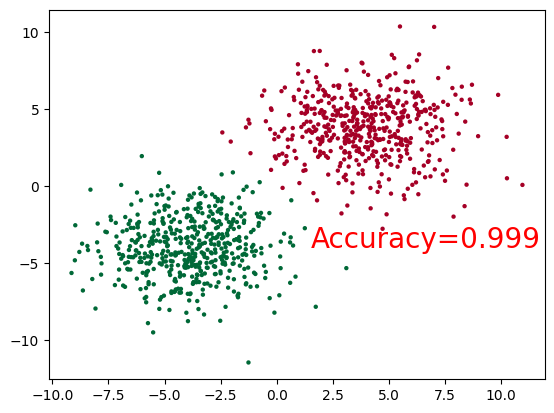

In [2]:
#coding=utf-8

import torch
import matplotlib.pyplot as plt
from torch import nn,optim   
 

cluster = torch.ones(500, 2) #ones函数生成500x2的数据
data0 = torch.normal(4*cluster, 2) #构造一个均值为4，标准差为2的数据簇
data1 = torch.normal(-4*cluster, 2) #构造一个均值为4，标准差为2的数据簇
label0 = torch.zeros(500) #500个标签0
label1 = torch.ones(500) #500个标签1

x = torch.cat((data0, data1), ).type(torch.FloatTensor) 
y = torch.cat((label0, label1), ).type(torch.LongTensor)

plt.scatter(x.numpy()[:,0], x.numpy()[:, 1], c=y.numpy(), s=10, lw=0, cmap='RdYlGn')
plt.show()

class Net(nn.Module):     # 继承 torch 的 Module
    def __init__(self):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.linear = nn.Linear(2,2)

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x


CUDA = torch.cuda.is_available()

if CUDA:
    net = Net().cuda()
    inputs = x.cuda()
    target = y.cuda()
else:
    net = Net()
    inputs = x
    target = y

optimizer = optim.SGD(net.parameters(), lr=0.02)
criterion = nn.CrossEntropyLoss()

def draw(output):
    if CUDA:
        output=output.cpu()
    plt.cla()
    output = torch.max((output), 1)[1] 
    pred_y = output.data.numpy().squeeze()
    target_y = y.numpy()
    plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y, s=10, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y)/1000.0  
    plt.text(1.5, -4, 'Accuracy=%s' % (accuracy), fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)


def train(model,criterion,optimizer,epochs):
    output = model(inputs)
    for epoch in range(epochs):
        #forward
        output = model(inputs)
        loss = criterion(output,target)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 40 == 0:
            print(loss.item())
    draw(output)


train(net,criterion,optimizer,1000)

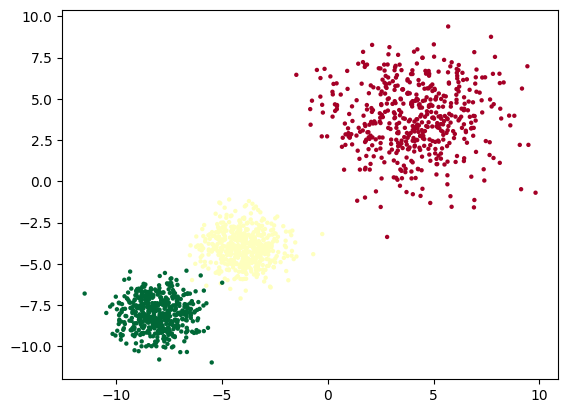

/tmp/ipykernel_46413/2404148764.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)     #使用softmax将输出层的数据转换成概率值


1.4065907001495361
0.8645698428153992
0.8037230372428894
0.7863683104515076
0.772793710231781
0.760598361492157
0.7492446899414062
0.7385441064834595
0.7283973693847656
0.7187356948852539
0.709511399269104
0.700695812702179
0.6922796964645386
0.6842700242996216
0.6766772866249084
0.6695165038108826
0.6628040075302124
0.6565465331077576
0.6507356762886047
0.6453543901443481
0.6403805613517761
0.635789155960083
0.6315532326698303
0.6276448965072632
0.6240369081497192
0.6207035183906555
0.6176210641860962
0.614767849445343
0.612123429775238
0.6096689701080322
0.6073874831199646
0.6052634716033936
0.6032834053039551
0.6014345288276672
0.599705696105957
0.5980870127677917
0.5965690612792969
0.5951434969902039
0.5938027501106262
0.5925402641296387
0.5913495421409607
0.5902253985404968
0.5891625285148621
0.5881563425064087
0.5872030258178711
0.586298406124115
0.5854392647743225
0.5846222639083862
0.5838446617126465
0.5831037759780884
0.5823972225189209
0.5817226767539978
0.5810781121253967
0.

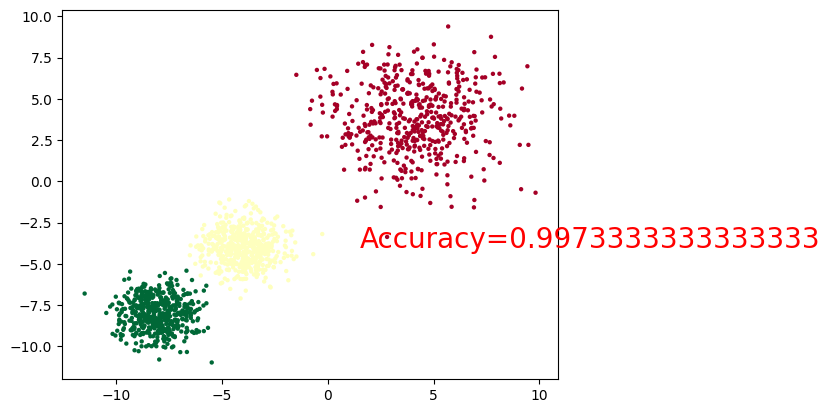

In [3]:
#coding=utf-8

import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn,optim
 
# 生成数据
cluster = torch.ones(500, 2) 
data0 = torch.normal(4*cluster, 2)      
data1 = torch.normal(-4*cluster, 1)    
data2 = torch.normal(-8*cluster, 1)     
label0 = torch.zeros(500)
label1 = torch.ones(500)                
label2 = label1*2  #500个标签2
 
x = torch.cat((data0, data1, data2), ).type(torch.FloatTensor)  
y = torch.cat((label0, label1, label2), ).type(torch.LongTensor)    
 
plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=10, lw=0, cmap='RdYlGn')
plt.show()

class Net(nn.Module):    
    def __init__(self, input_feature, num_hidden,outputs):
        super(Net, self).__init__()     
        self.hidden = nn.Linear(input_feature, num_hidden)   # 线性隐含层
        self.out = nn.Linear(num_hidden, outputs)       # 输出层

    def forward(self, x):
        x = F.relu(self.hidden(x))      # 激励函数ReLU处理隐含层的输出
        x = self.out(x)
        x = F.softmax(x)     #使用softmax将输出层的数据转换成概率值           
        return x

CUDA = torch.cuda.is_available()

if CUDA:
    net = Net(input_feature=2, num_hidden=20,outputs=3).cuda()
    inputs = x.cuda()
    target = y.cuda()
else:
    net = Net(input_feature=2, num_hidden=20,outputs=3)
    inputs = x
    target = y

optimizer = optim.SGD(net.parameters(), lr=0.02)
criterion = nn.CrossEntropyLoss()

def draw(output):
    if CUDA:
        output=output.cpu()
    plt.cla()
    output = torch.max((output), 1)[1] 
    pred_y = output.data.numpy().squeeze()
    target_y = y.numpy()
    plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y, s=10, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y)/1500.0  
    plt.text(1.5, -4, 'Accuracy=%s' % (accuracy), fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)

def train(model,criterion,optimizer,epochs):
    output = model(inputs)
    for epoch in range(epochs):
        #forward
        output = model(inputs)
        
        loss = criterion(output,target)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 40 == 0:
            print(loss.item())
    
    draw(output)


train(net,criterion,optimizer,10000)

